In [62]:
import pandas as pd
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from category_encoders.target_encoder import TargetEncoder
import numpy as np

In [2]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})

In [3]:
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('student-mat.csv')

<Axes: xlabel='G3', ylabel='Count'>

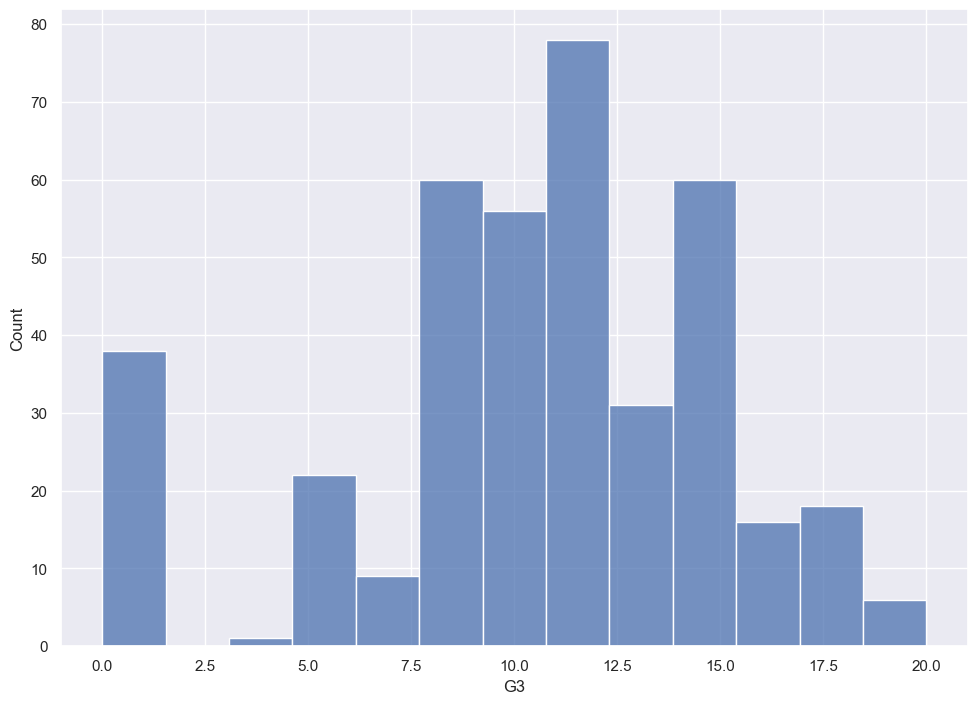

In [5]:
sns.histplot(data['G3'])

In [6]:
data = data[data['G3'] != 0]

<Axes: xlabel='G3', ylabel='Count'>

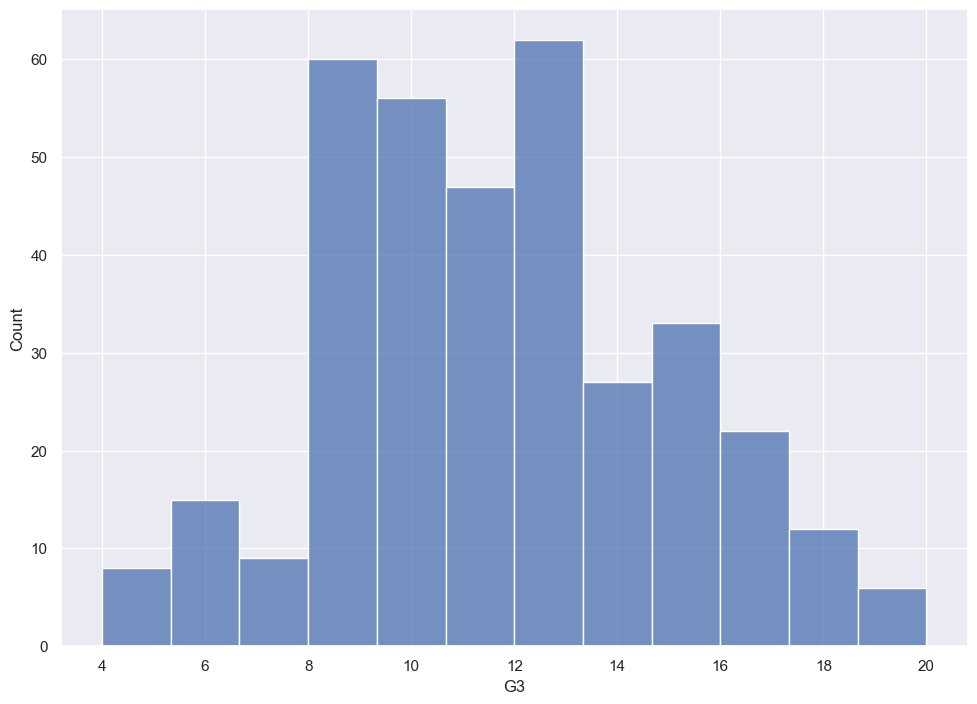

In [7]:
sns.histplot(data['G3'])

In [8]:
X = data.drop(columns=['G3'])
y = data['G3']

In [9]:
len(X)

357

In [10]:
len(y)

357

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=0)

In [12]:
len(X_train)

307

In [13]:
len(X_test)

50

In [14]:
X_y_train = X_train.copy(deep=True)

In [15]:
X_y_train['y'] = y_train

In [23]:
X_y_train.corr(numeric_only=True)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,y
age,1.000000,-0.143667,-0.152028,0.124947,-0.012044,0.265867,0.105719,0.018381,0.127471,-0.066960,0.232719,-0.058061,-0.163554
Medu,-0.143667,1.000000,0.622469,-0.189125,0.059405,-0.217911,-0.005481,-0.021037,0.080858,-0.030022,0.052977,0.180870,0.205427
Fedu,-0.152028,0.622469,1.000000,-0.194381,-0.031392,-0.265805,-0.031753,-0.054498,0.029325,-0.007715,-0.015996,0.160996,0.150231
traveltime,0.124947,-0.189125,-0.194381,1.000000,-0.105084,0.131414,-0.002823,-0.007708,0.062239,0.016959,0.028547,-0.119743,-0.131757
studytime,-0.012044,0.059405,-0.031392,-0.105084,1.000000,-0.136720,0.063829,-0.132218,-0.018720,-0.087165,-0.098216,0.156326,0.158553
failures,0.265867,-0.217911,-0.265805,0.131414,-0.136720,1.000000,-0.020901,0.133293,0.195804,0.042964,0.161519,-0.326272,-0.311091
famrel,0.105719,-0.005481,-0.031753,-0.002823,0.063829,-0.020901,1.000000,0.183048,0.068130,0.140506,-0.073748,0.052678,0.075401
freetime,0.018381,-0.021037,-0.054498,-0.007708,-0.132218,0.133293,0.183048,1.000000,0.255339,0.086641,-0.074686,-0.023542,-0.051553
goout,0.127471,0.080858,0.029325,0.062239,-0.018720,0.195804,0.068130,0.255339,1.000000,-0.061314,0.057467,-0.170340,-0.196119
health,-0.066960,-0.030022,-0.007715,0.016959,-0.087165,0.042964,0.140506,0.086641,-0.061314,1.000000,-0.057903,-0.074392,-0.071237


In [25]:
corr = X_y_train.corr(numeric_only=True)['y']

In [26]:
corr = corr[(corr >= 0.1) | (corr <= -0.1)]

In [27]:
corr

age          -0.163554
Medu          0.205427
Fedu          0.150231
traveltime   -0.131757
studytime     0.158553
failures     -0.311091
goout        -0.196119
absences     -0.229859
G1            0.896589
y             1.000000
Name: y, dtype: float64

<Axes: xlabel='G1', ylabel='y'>

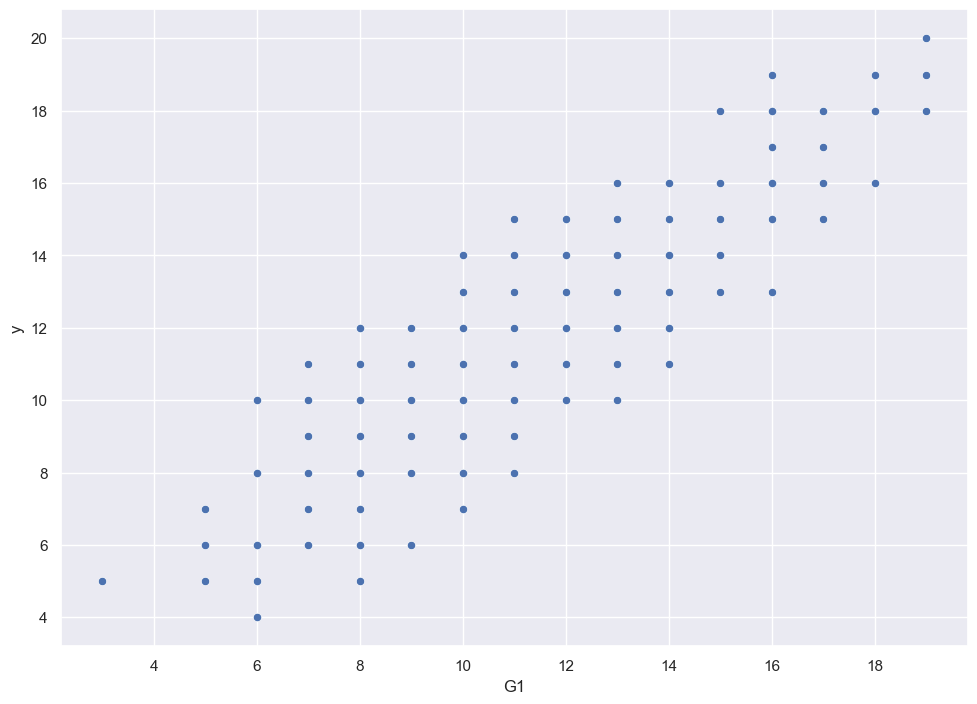

In [29]:
sns.scatterplot(x=X_y_train['G1'], y=X_y_train['y'])

<Axes: xlabel='age', ylabel='y'>

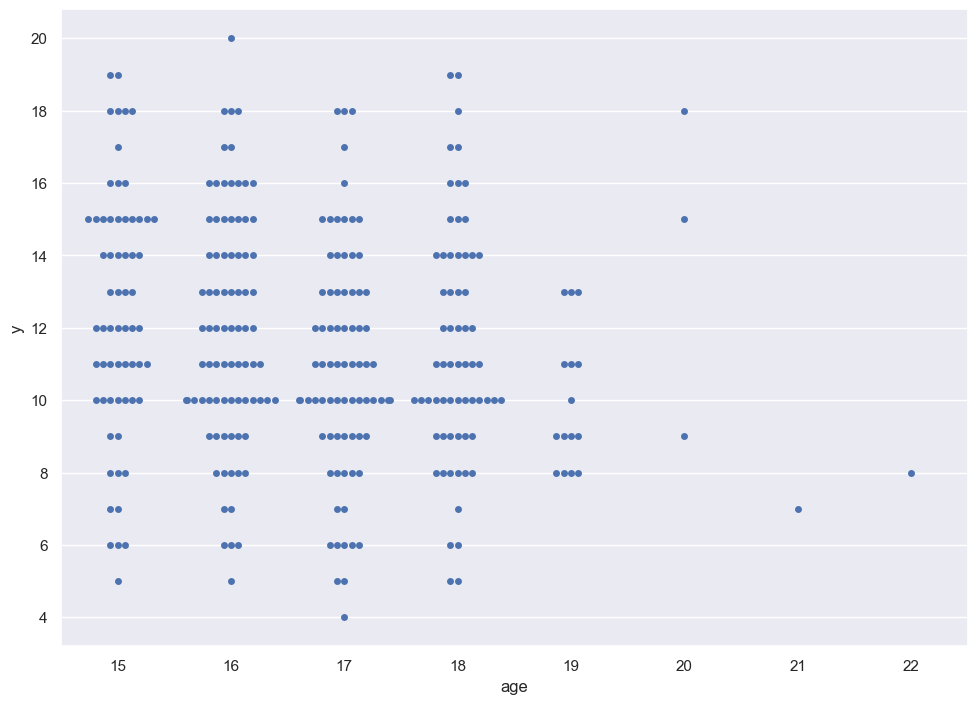

In [35]:
sns.swarmplot(x=X_y_train['age'], y=X_y_train['y'])

In [38]:
X_y_train.groupby('higher', as_index=False) \
         .agg({'y':'mean'})

,higher,y
0,no,9.833333
1,yes,11.657627


In [49]:
numeric_factors_to_use = ['age', 'traveltime', 'G1', 'studytime', 'Medu', 'Fedu', 'failures']

In [46]:
mjob_target_encoder = TargetEncoder()
mjob_target_encoder.fit(X_y_train['Mjob'], X_y_train['y'])

fjob_target_encoder = TargetEncoder()
fjob_target_encoder.fit(X_y_train['Fjob'], X_y_train['y'])

schoolsup_target_encoder = TargetEncoder()
schoolsup_target_encoder.fit(X_y_train['schoolsup'], X_y_train['y'])

higher_target_encoder = TargetEncoder()
higher_target_encoder.fit(X_y_train['higher'], X_y_train['y'])

TargetEncoder(cols=['higher'])

In [47]:
X_y_train['Mjob_encoded'] = mjob_target_encoder.transform(X_y_train['Mjob'])
X_y_train['Fjob_encoded'] = fjob_target_encoder.transform(X_y_train['Fjob'])
X_y_train['schoolsup_encoded'] = schoolsup_target_encoder.transform(X_y_train['schoolsup'])
X_y_train['higher_encoded'] = higher_target_encoder.transform(X_y_train['higher'])

In [48]:
X_y_train

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,health,absences,G1,y,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded
295,GP,M,17,U,GT3,T,3,3,health,other,...,4,3,5,4,14,11,12.781907,11.339181,11.835821,11.657627
224,GP,F,16,U,GT3,T,4,4,teacher,services,...,3,2,5,0,13,14,11.734708,11.476373,11.835821,11.657627
197,GP,M,16,R,LE3,T,3,3,teacher,other,...,3,4,3,8,9,10,11.734708,11.339181,11.835821,11.657627
231,GP,M,17,R,GT3,T,2,2,other,other,...,5,2,1,4,11,11,10.963057,11.339181,11.835821,11.657627
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,6,6,6,10.963057,12.723082,10.094869,11.657627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,MS,F,17,U,LE3,A,3,2,services,other,...,2,3,5,2,12,11,12.251790,11.339181,11.835821,11.657627
210,GP,F,19,U,GT3,T,3,3,other,other,...,3,3,3,10,8,8,10.963057,11.339181,11.835821,11.657627
117,GP,M,16,U,GT3,T,3,3,other,services,...,4,2,5,0,13,13,10.963057,11.476373,11.835821,11.657627
47,GP,M,16,U,GT3,T,4,3,health,services,...,2,2,2,4,19,20,12.781907,11.476373,11.835821,11.657627


In [50]:
factors_to_use = numeric_factors_to_use + ['Mjob_encoded', 'Fjob_encoded', 'schoolsup_encoded', 'higher_encoded']

In [51]:
X_train_encoded = X_y_train.copy(deep=True)

In [52]:
X_train_encoded = X_train_encoded[factors_to_use]

In [53]:
X_train_encoded

,age,traveltime,G1,studytime,Medu,Fedu,failures,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded
295,17,1,14,1,3,3,0,12.781907,11.339181,11.835821,11.657627
224,16,1,13,3,4,4,0,11.734708,11.476373,11.835821,11.657627
197,16,3,9,1,3,3,0,11.734708,11.339181,11.835821,11.657627
231,17,2,11,2,2,2,0,10.963057,11.339181,11.835821,11.657627
7,17,2,6,2,4,4,0,10.963057,12.723082,10.094869,11.657627
...,...,...,...,...,...,...,...,...,...,...,...
357,17,2,12,2,3,2,0,12.251790,11.339181,11.835821,11.657627
210,19,1,8,4,3,3,0,10.963057,11.339181,11.835821,11.657627
117,16,2,13,1,3,3,0,10.963057,11.476373,11.835821,11.657627
47,16,1,19,4,4,3,0,12.781907,11.476373,11.835821,11.657627


In [55]:
scaler = MinMaxScaler()
scaler.fit(X_train_encoded)

MinMaxScaler()

In [57]:
X_train_scaled = scaler.transform(X_train_encoded)

In [58]:
X_train_scaled

array([[0.28571429, 0.        , 0.6875    , ..., 0.        , 1.        ,
        1.        ],
       [0.14285714, 0.        , 0.625     , ..., 0.09913411, 1.        ,
        1.        ],
       [0.14285714, 0.66666667, 0.375     , ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.14285714, 0.33333333, 0.625     , ..., 0.09913411, 1.        ,
        1.        ],
       [0.14285714, 0.        , 1.        , ..., 0.09913411, 1.        ,
        1.        ],
       [0.14285714, 0.        , 0.5       , ..., 0.09913411, 1.        ,
        1.        ]])

In [60]:
X_train_scaled[:, 0]

array([0.28571429, 0.14285714, 0.14285714, 0.28571429, 0.28571429,
       0.        , 0.14285714, 0.28571429, 0.42857143, 0.42857143,
       0.14285714, 0.14285714, 0.        , 0.        , 0.        ,
       0.42857143, 0.14285714, 0.28571429, 0.14285714, 0.28571429,
       0.14285714, 0.28571429, 0.42857143, 0.42857143, 0.28571429,
       0.        , 0.        , 0.42857143, 0.28571429, 0.        ,
       0.42857143, 0.42857143, 0.42857143, 0.14285714, 0.28571429,
       0.        , 0.14285714, 0.14285714, 0.14285714, 0.42857143,
       0.        , 0.        , 0.42857143, 0.        , 0.        ,
       0.14285714, 0.42857143, 0.28571429, 0.14285714, 0.14285714,
       0.42857143, 0.28571429, 1.        , 0.42857143, 0.        ,
       0.14285714, 0.28571429, 0.28571429, 0.14285714, 0.28571429,
       0.28571429, 0.14285714, 0.28571429, 0.        , 0.28571429,
       0.14285714, 0.        , 0.28571429, 0.42857143, 0.14285714,
       0.28571429, 0.14285714, 0.28571429, 0.28571429, 0.57142

In [63]:
model = LinearRegression()

In [64]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [65]:
model.score(X_train_scaled, y_train)

0.8206863785263498

In [66]:
X_test['Mjob_encoded'] = mjob_target_encoder.transform(X_test['Mjob'])
X_test['Fjob_encoded'] = fjob_target_encoder.transform(X_test['Fjob'])
X_test['schoolsup_encoded'] = schoolsup_target_encoder.transform(X_test['schoolsup'])
X_test['higher_encoded'] = higher_target_encoder.transform(X_test['higher'])

In [67]:
X_test_encoded = X_test[factors_to_use]

In [69]:
X_test_scaled = scaler.transform(X_test_encoded)

In [70]:
X_test_scaled

array([[0.14285714, 0.        , 0.5625    , 0.33333333, 0.5       ,
        0.5       , 0.        , 0.12829793, 0.        , 1.        ,
        1.        ],
       [0.        , 0.33333333, 0.4375    , 0.66666667, 0.75      ,
        0.75      , 0.66666667, 0.74593618, 0.09913411, 1.        ,
        1.        ],
       [0.42857143, 0.        , 0.375     , 1.        , 0.5       ,
        0.5       , 0.        , 0.12829793, 0.        , 1.        ,
        1.        ],
       [0.28571429, 0.33333333, 0.5625    , 0.33333333, 1.        ,
        0.75      , 0.        , 1.        , 0.        , 1.        ,
        1.        ],
       [0.14285714, 0.        , 0.25      , 0.66666667, 0.75      ,
        0.75      , 0.        , 0.12829793, 0.        , 1.        ,
        1.        ],
       [0.14285714, 0.66666667, 0.25      , 0.33333333, 0.75      ,
        0.75      , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.375     , 0.33333333, 0.

In [71]:
model.score(X_test_scaled, y_test)

0.7278059083711641

In [74]:
def score_model(model, X_test, y_test):
    y_preds = model.predict(X_test)

    errs = []
    
    for y, y_pred in zip(y_test, y_preds):
        errs.append(abs(y - y_pred))

    mae = sum(errs) / len(errs)

    mean_y_test = sum(y_test) / len(y_test)
    r2 = 1 - sum(err**2 for err in errs) / sum((y - mean_y_test) ** 2 for y in y_test)

    return mae, r2

In [75]:
score_model(model, X_test_scaled, y_test)

(1.2899322007832241, 0.7278059083711641)

In [77]:
maes = []
r2s = []

X_y_test = X_test_encoded.copy(deep=True)
X_y_test['y'] = y_test

for i in range(1000):
    X_y_sample = X_y_test.sample(len(X_y_test), replace=True)

    X_test_sample = X_y_sample.drop(columns=['y'])
    X_test_sample = scaler.transform(X_test_sample)
    y_test_sample = X_y_sample['y']

    mae_sample, r2_sample = score_model(model, X_test_sample, y_test_sample)

    maes.append(mae_sample)
    r2s.append(r2_sample)

In [80]:
maes = list(sorted(maes))
maes

[0.9464520627650862,
 0.966197777474498,
 0.9690420766343852,
 0.988172213975755,
 0.9931235639574291,
 0.9958310260652652,
 0.9990454515303527,
 1.0152893792754176,
 1.019316963087517,
 1.0194075269211396,
 1.0276381032829323,
 1.0301281733042211,
 1.0429659466986863,
 1.045198322942202,
 1.045489133318616,
 1.0506431972521686,
 1.0535819132802655,
 1.0564905159027034,
 1.0568234089100645,
 1.0577286464689641,
 1.0649682803948073,
 1.0675066391570225,
 1.0695868594053675,
 1.0696513161024945,
 1.069742798916684,
 1.0719351483940478,
 1.07533662494492,
 1.078524104945559,
 1.0807592711637104,
 1.0815871957734149,
 1.0820635124980997,
 1.0832274924012777,
 1.0833035844158547,
 1.083492208141393,
 1.0843703780922802,
 1.0860674280087665,
 1.086769191883321,
 1.0872340098615267,
 1.0894531353181272,
 1.0897264558988942,
 1.0950036822496765,
 1.0953628139028464,
 1.0992885209350225,
 1.1035747407607233,
 1.106639050863437,
 1.1078297480000456,
 1.1090550226233375,
 1.1094282963504165,
 1.1

In [81]:
maes = maes[25:975]

In [82]:
maes[0], maes[-1]

(1.0719351483940478, 1.5271893408787556)

<Axes: ylabel='Count'>

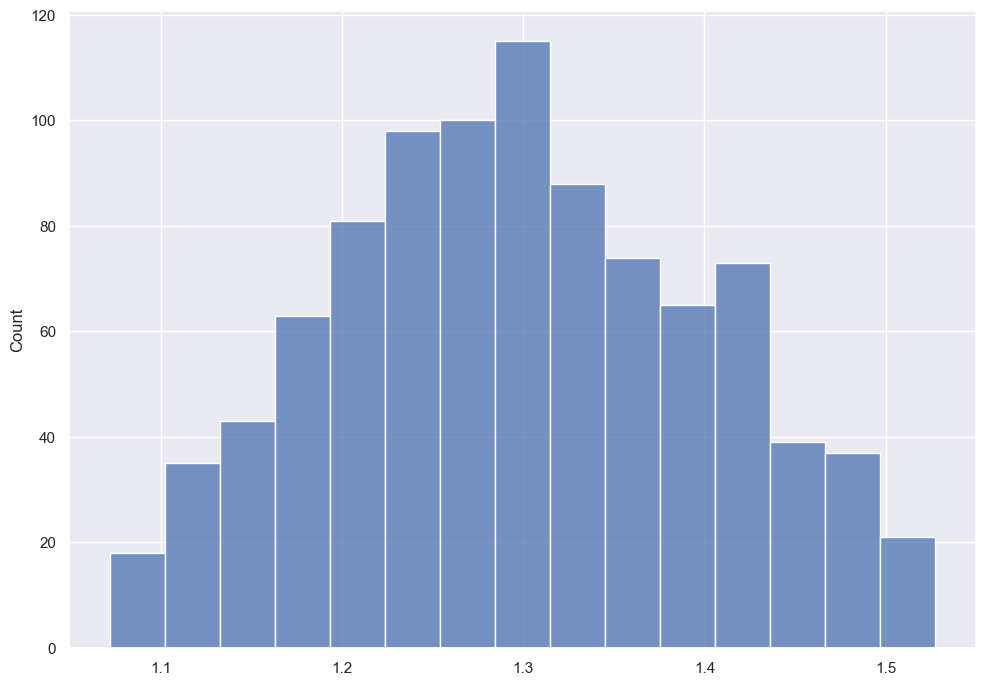

In [83]:
sns.histplot(maes)

In [84]:
model.coef_

array([-2.06518364e+00, -1.01854381e-01,  1.40527065e+01,  2.45512549e-01,
        3.84307987e-01, -4.39096593e-01,  5.01665694e-02,  4.29031890e-01,
       -2.22934549e-03,  1.72824110e-01, -2.68099833e-01])

In [87]:
for x, y in zip(X_train_encoded, model.coef_):
    print(x, round(y, 2))

age -2.07
traveltime -0.1
G1 14.05
studytime 0.25
Medu 0.38
Fedu -0.44
failures 0.05
Mjob_encoded 0.43
Fjob_encoded -0.0
schoolsup_encoded 0.17
higher_encoded -0.27


In [89]:
X_y_train.groupby('age').agg({'y':'mean'})

,y
age,
15,12.412698
16,11.963855
17,10.961039
18,11.421875
19,10.000000
20,14.000000
21,7.000000
22,8.000000


<Axes: xlabel='age', ylabel='y'>

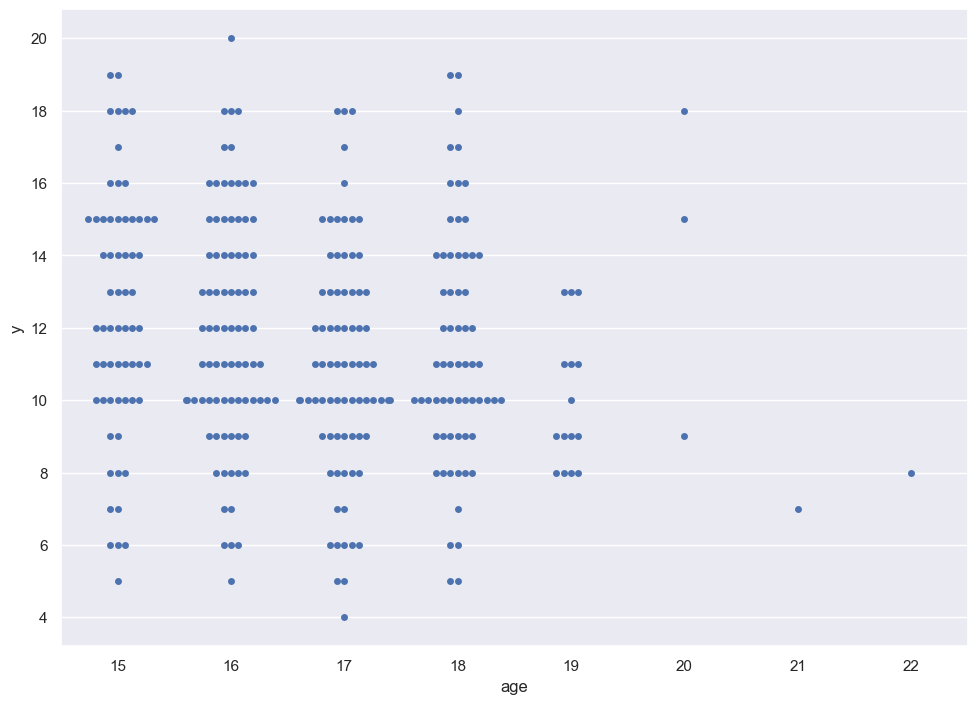

In [92]:
sns.swarmplot(x=X_y_train['age'], y=X_y_train['y'])